In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

from PIL import Image
import math
from sklearn.metrics import accuracy_score,hamming_loss, accuracy_score, f1_score, precision_score, recall_score

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from textwrap import wrap


from utils import KunischMetrics
from utils import KunischPruner
from utils import DataExplorer
from utils import KunischPlotter

In [52]:
output_dir = os.path.join('..', 'outputs', 'alexnet26l')
target = 'hl'
target_name = 'Hamming Loss'

scores_no_pw = []
scores_pw = []

experimentos = os.listdir(output_dir)
apellidos = ['', '_weighted_1']


# Iterar sobre archivos de resultados sacando el target buscado
for exp in experimentos:
    for apellido in apellidos:
        path_predicciones = os.path.join(output_dir, exp, f'{26}L{apellido}', 'metadata.csv')
        predicciones = pd.read_csv(path_predicciones, index_col = 0)
        score = float(predicciones.loc[[target]].values[0][0])
        #print(path_predicciones, score[0][0])
        if apellido == '':
            scores_no_pw.append(score)
        else:
            scores_pw.append(score)
        print(exp, apellido, score)
            

base  0.0854
base _weighted_1 0.1352
blur  0.0849
blur _weighted_1 0.1124
blur_rain_ref_rot_crop1_elastic1  0.0868
blur_rain_ref_rot_crop1_elastic1 _weighted_1 0.1214
blur_rain_ref_rot_crop1_randaug1_elastic1  0.0892
blur_rain_ref_rot_crop1_randaug1_elastic1 _weighted_1 0.115
blur_rain_ref_rot_elastic1  0.0855
blur_rain_ref_rot_elastic1 _weighted_1 0.1119
crop1  0.0959
crop1 _weighted_1 0.1324
elastic1  0.0865
elastic1 _weighted_1 0.1221
gausblur1  0.0897
gausblur1 _weighted_1 0.1125
mtnblur  0.1082
mtnblur _weighted_1 0.1672
rain  0.0849
rain _weighted_1 0.1058
rain_ref_rot  0.0843
rain_ref_rot _weighted_1 0.1113
rain_ref_rot_elastic1  0.0857
rain_ref_rot_elastic1 _weighted_1 0.1163
randaug1  0.084
randaug1 _weighted_1 0.1162
ref  0.081
ref _weighted_1 0.1144
ref_rot  0.0903
ref_rot _weighted_1 0.1214
rot  0.0849
rot _weighted_1 0.1176


In [53]:
techniques = []
for exp in experimentos:
    if 'weighted' not in exp:
        label = exp.replace('_', ' ')
        label = label.replace('1', '')
        techniques.append(label)
techniques

['base',
 'blur',
 'blur rain ref rot crop elastic',
 'blur rain ref rot crop randaug elastic',
 'blur rain ref rot elastic',
 'crop',
 'elastic',
 'gausblur',
 'mtnblur',
 'rain',
 'rain ref rot',
 'rain ref rot elastic',
 'randaug',
 'ref',
 'ref rot',
 'rot']

In [54]:
plt.rcParams.update({'font.size': 11})
plt.rcParams['figure.dpi'] = 1000

rain 0.1058 0.0849
rain ref rot 0.1113 0.0843
blur rain ref rot elastic 0.1119 0.0855
blur 0.1124 0.0849
gausblur 0.1125 0.0897
ref 0.1144 0.081
blur rain ref rot crop randaug elastic 0.115 0.0892
randaug 0.1162 0.084
rain ref rot elastic 0.1163 0.0857
rot 0.1176 0.0849
blur rain ref rot crop elastic 0.1214 0.0868
ref rot 0.1214 0.0903
elastic 0.1221 0.0865
crop 0.1324 0.0959
base 0.1352 0.0854
mtnblur 0.1672 0.1082


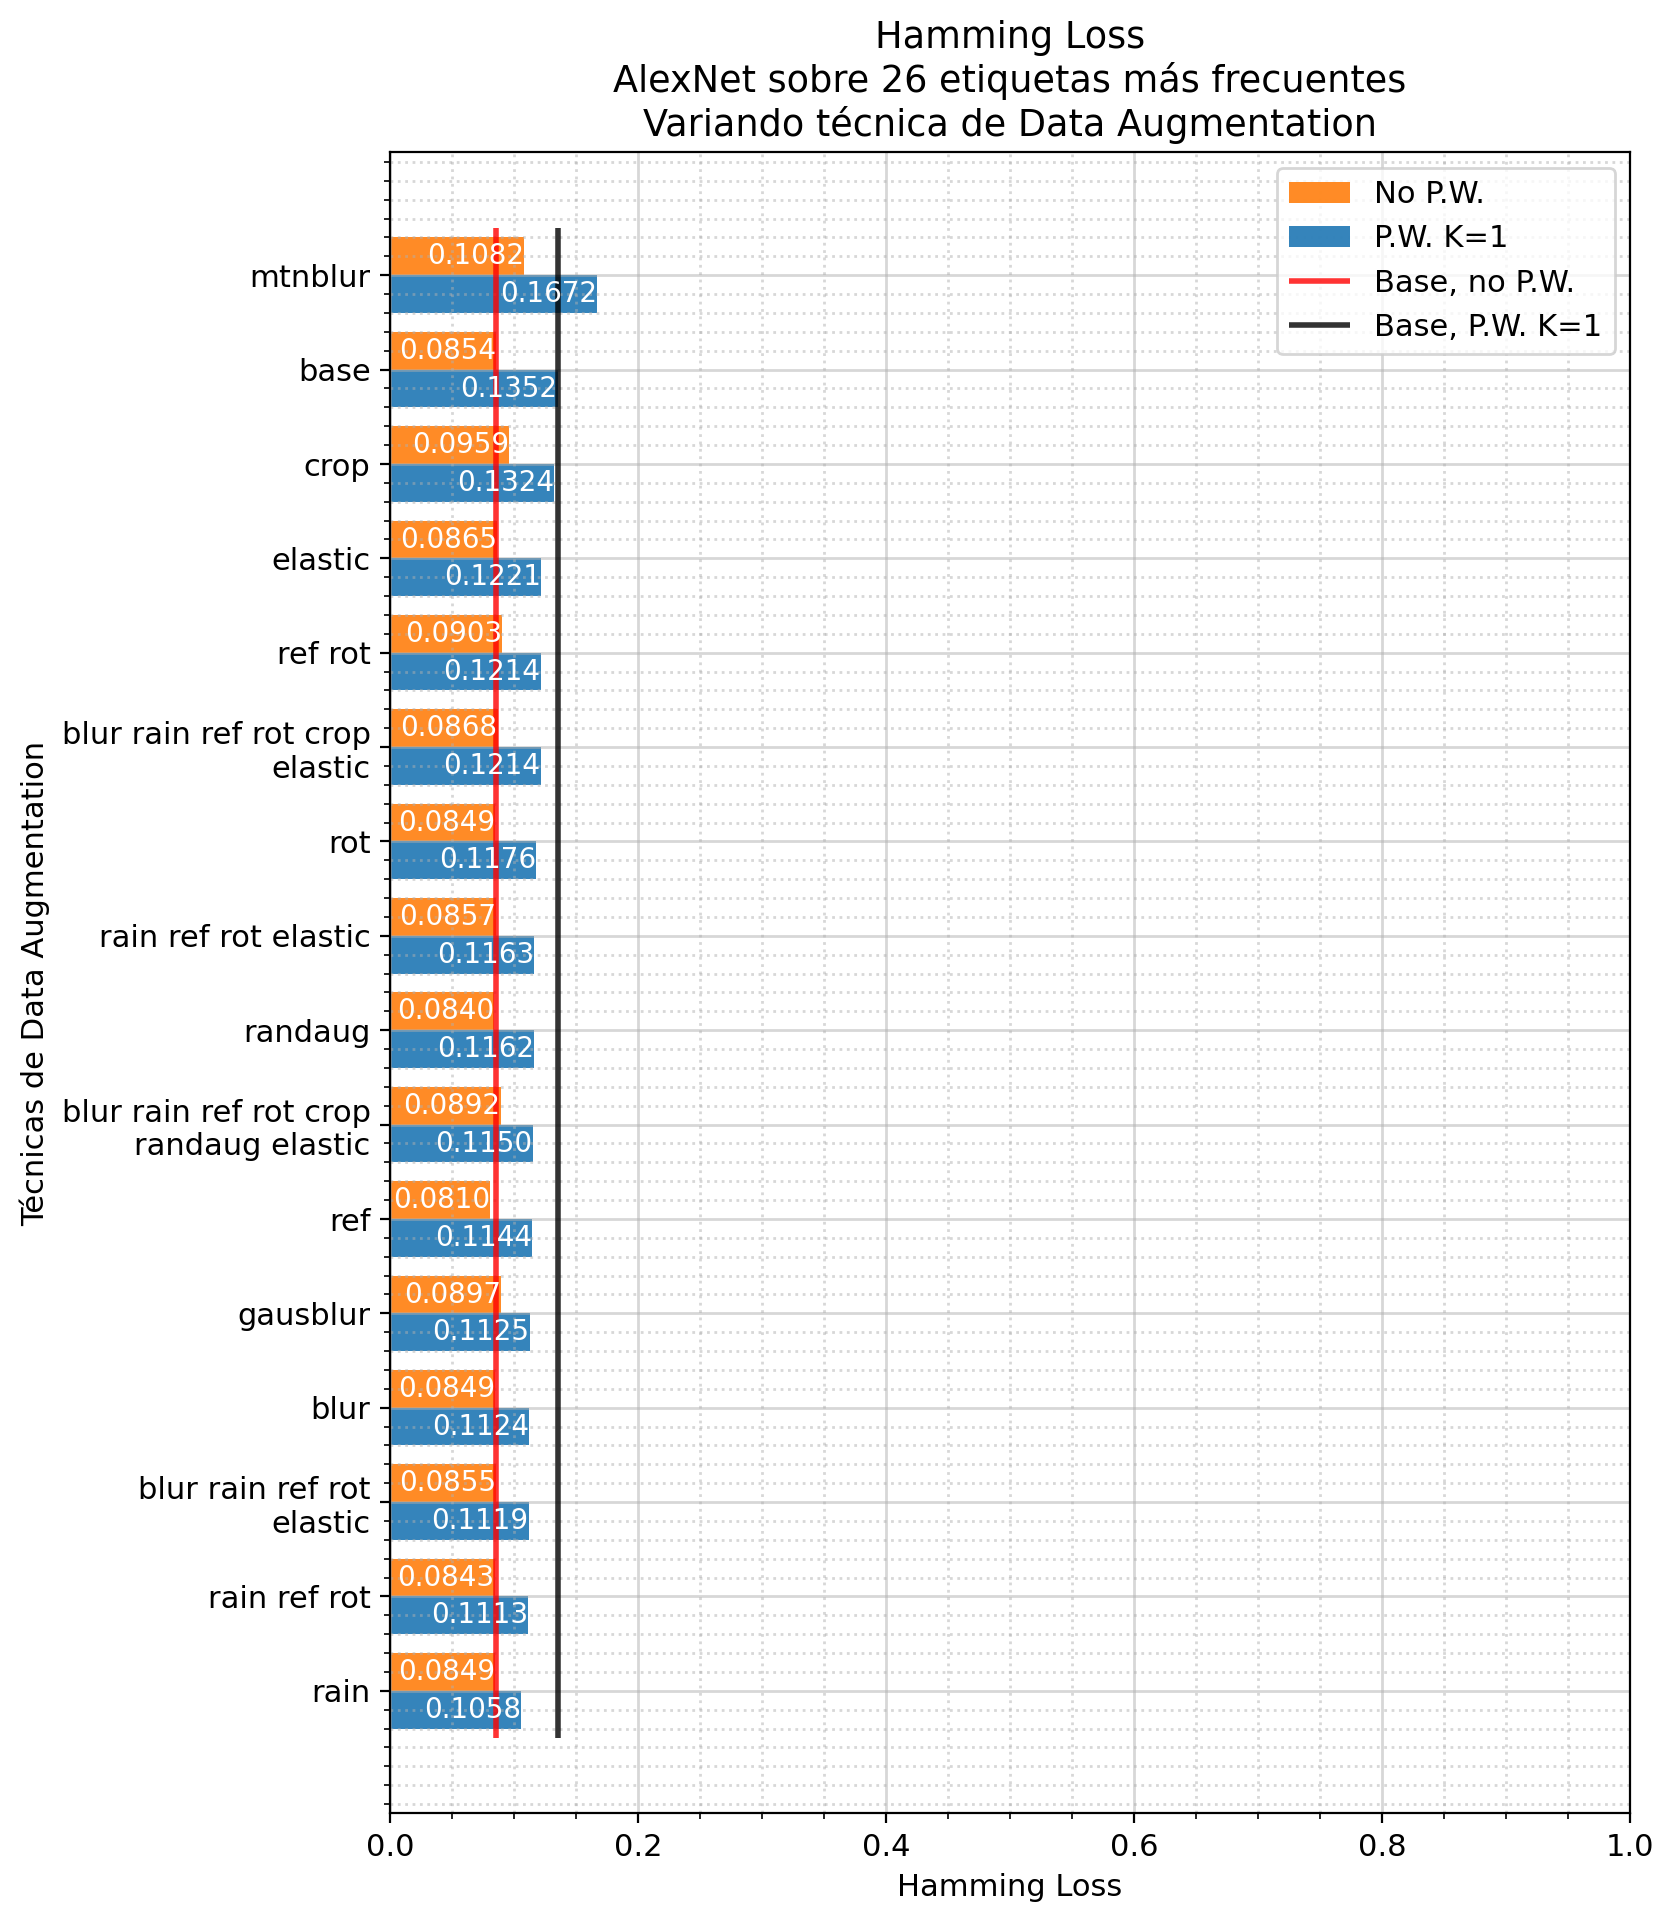

In [56]:
# ordenar 
s_pw, s_no_pw, techsorted = zip(*sorted(zip(scores_pw, scores_no_pw, techniques)))

for i in range(0, len(techniques)):
    print(techsorted[i], s_pw[i], s_no_pw[i])
     
# wrap de las etiquetas cuando exceden cierto largo
techsorted = ['\n'.join(wrap(l, 22)) for l in techsorted]
x = np.arange(len(techsorted))

fig, ax = plt.subplots()
width = 0.4

b1 = ax.barh(x - width/2, s_pw, width, label = 'P.W. K=1', color='tab:blue', alpha=0.9)
b2 = ax.barh(x + width/2, s_no_pw, width, label = 'No P.W.', color='tab:orange', alpha=0.9)
order = [3, 2, 0, 1]


ax.set_xlabel(target_name)
ax.set_ylabel('Técnicas de Data Augmentation')

ax.set_title(target_name + '\nAlexNet sobre 26 etiquetas más frecuentes\nVariando técnica de Data Augmentation')

# linea horizontal marcando el resultado base no pw
index_base = techsorted.index('base')
plt.vlines(x=s_no_pw[index_base], color='red', linewidth=2, 
           ymin=-0.5, ymax=15.5, label = 'Base, no P.W.',
           alpha=0.8)
plt.vlines(x=s_pw[index_base], color='black', linewidth=2,
           ymin=-0.5, ymax=15.5, label = 'Base, P.W. K=1',
           alpha=0.8)

# rotar labels del eje x
#plt.xticks(rotation=90)
fig.set_size_inches(8, 11)
fig.set_dpi(200)

ax.grid(which='both')
ax.minorticks_on()
# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='1', alpha=0.5)
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='1', alpha=0.5)

            
# legends en orden deseado
handles, ls = plt.gca().get_legend_handles_labels()
ax.legend([handles[idx] for idx in order],[ls[idx] for idx in order], loc='upper right')
ax.bar_label(b1, fmt= '%.4f', padding=-35, color='white', size=10)
ax.bar_label(b2, fmt= '%.4f', padding=-35, color='white', size=10)
    
ax.set_yticks(x, techsorted)

ax.set_xlim(0, 1)
plt.show()
